<a href="https://colab.research.google.com/github/medaminemghirbi/Freelancy/blob/main/Project_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Loading Data from drive**

In [3]:
import pandas as pd
# Load the dataset
df = pd.read_csv("/content/project_IA/diabetes.csv")

**2. Display the  Dataset of diabetes**

In [ ]:
# Explore the dataset
print("Dataset shape:", df.shape)
print("\n First few rows of the dataset:")
print(df.head())

**3. statistic of dataset**

In [ ]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())

 **4. Data Cleaning**

1.   Check for Missing/Null Values




In [ ]:
# Check for missing/null values
count_miss = df.fillna(df.mean(), inplace=True)
count_null = df.isnull().sum()
print("\n Null values:")
print(count_null)
print("\n Missing  values:")
print(count_miss)



2.   Remove duplicate value if exist




In [ ]:
df.drop_duplicates(inplace=True)

**5. Data Visualization**

1.  Data visualization

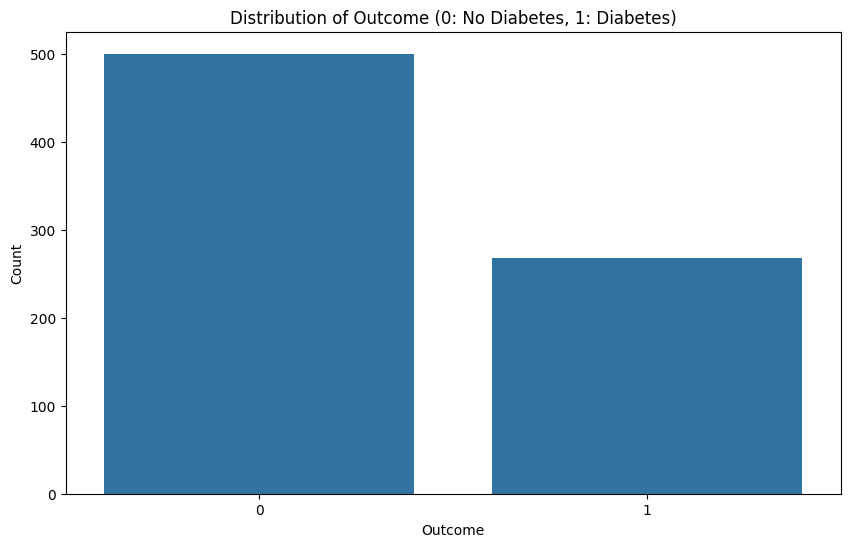

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data visualization
plt.figure(figsize=(10, 6))
sns.countplot(x="Outcome", data=df)
plt.title("Distribution of Outcome (0: No Diabetes, 1: Diabetes)")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()


2. Correlation heatmap



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**6. Split the Data into Features and Target**


In [23]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

**7. Split the Data into Training and Testing Sets**

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**8. Standardize the Features**

In [24]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**9. Train and Evaluate Models**

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

def perform_grid_search(X_train_scaled, X_test_scaled, y_train, y_test):
    # Define the parameter grids for each model
    param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    param_grid_dt = {'max_depth': [None, 5, 10, 15, 20]}
    param_grid_rf = {'n_estimators': [50, 100, 150, 200], 'max_depth': [None, 5, 10, 15, 20]}
    param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}

    # Define models
    models = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "K-Nearest Neighbors": KNeighborsClassifier()
    }

    # Define parameter grids
    param_grids = {
        "Logistic Regression": param_grid_lr,
        "Decision Tree": param_grid_dt,
        "Random Forest": param_grid_rf,
        "K-Nearest Neighbors": param_grid_knn
    }

    # Perform grid search and store results
    results = {}
    for name, model in models.items():
        param_grid = param_grids[name]
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train)
        y_pred = grid_search.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        results[name] = {
            "best_params": grid_search.best_params_,
            "best_score": grid_search.best_score_,
            "test_accuracy": accuracy,
            "test_f1_score": f1,
            "classification_report": report
        }

    return results

def print_prediction_table(results):
    print("{:<20} {:<15} {:<15} {:<15} {:<15}".format("Model", "Accuracy", "F1 Score", "Precision", "Recall"))
    print("-" * 75)
    for name, result in results.items():
        accuracy = result["test_accuracy"]
        f1 = result["test_f1_score"]
        precision = result["classification_report"]["weighted avg"]["precision"]
        recall = result["classification_report"]["weighted avg"]["recall"]
        print("{:<20} {:<15.4f} {:<15.4f} {:<15.4f} {:<15.4f}".format(name, accuracy, f1, precision, recall))

# Usage example
results = perform_grid_search(X_train_scaled, X_test_scaled, y_train, y_test)
print_prediction_table(results)


Model                Accuracy        F1 Score        Precision       Recall         
---------------------------------------------------------------------------
Logistic Regression  0.7532          0.6607          0.7554          0.7532         
Decision Tree        0.7922          0.6863          0.7887          0.7922         
Random Forest        0.7468          0.6486          0.7478          0.7468         
K-Nearest Neighbors  0.7078          0.5794          0.7045          0.7078         


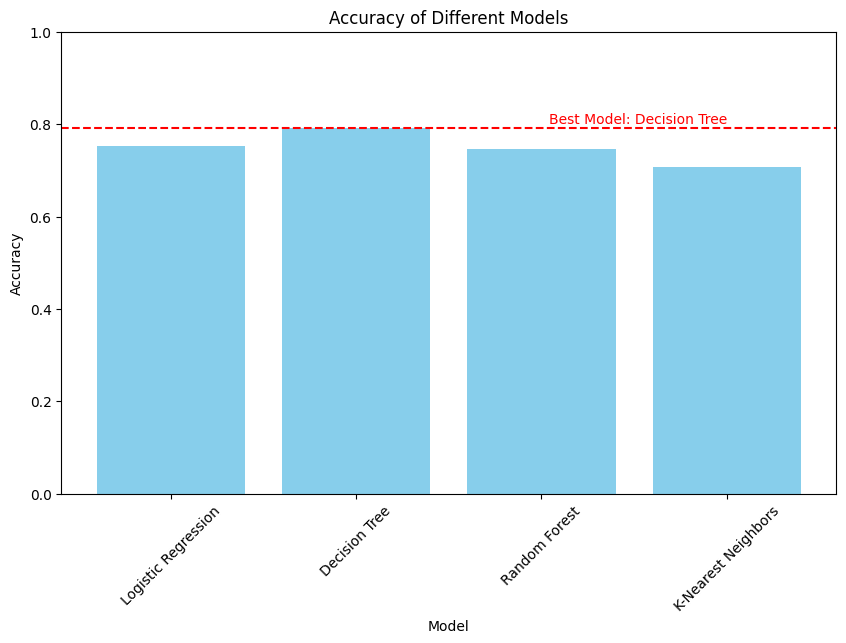

In [29]:
def plot_best_model_accuracy(results):
    # Find the best model based on accuracy
    best_model = max(results, key=lambda x: results[x]["test_accuracy"])
    best_accuracy = results[best_model]["test_accuracy"]

    # Plot accuracy for each model
    model_names = list(results.keys())
    test_accuracies = [results[name]["test_accuracy"] for name in model_names]

    plt.figure(figsize=(10, 6))
    plt.bar(model_names, test_accuracies, color='skyblue')
    plt.title('Accuracy of Different Models')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)

    # Highlight the best model
    plt.axhline(y=best_accuracy, color='red', linestyle='--')
    plt.text(len(model_names) - 1, best_accuracy + 0.01, f'Best Model: {best_model}', horizontalalignment='right', color='red')

    plt.show()
plot_best_model_accuracy(results)
